___

# GitHub commits activity analiysis
### Asliddin Tuxtasinov
___

### Kerakli kutubxonalarni chaqirib olamiz

In [ ]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Loyixamizga mos, yordamchi va qulay funksiyalar yaratib olamiz

In [ ]:
def get_owner_and_repoName(github_repo_link):
    """
    github_repo_link -> github repository url link
    return list consist of owner and repo
    
    example:
        github_repo_link = 'https://github.com/AsliddinTuxtasinov/like-netflix'
        owner = AsliddinTuxtasinov
        repo = like-netflix
    """
    link=github_repo_link.split('/')
    return link[3:]

In [ ]:
def get_github_commits_api_url(owner, repo):
    """
    return github commits api path url
    
    owner -> github profile owner
    repo -> repositoy's name
    
        f"https://api.github.com/repos/{owner}/{repo}/commits"
    """
    return f"https://api.github.com/repos/{owner}/{repo}/commits"

In [ ]:
def get_commiter_and_message(data, committer='committer', message='message'):
    """
    return dictionary
    
    data is list consist of dictionary.
    committer and message are the keys that we are loking for
    
    example:
        d = [{'author': {'name': 'Asliddin'},
              'committer': {'name': 'Asliddin','email': 'asliddin@gmail.com'},
              'message': '10-create ratings app.',
              'comment_count': 0
             }]
        res = get_commiter_and_message(data=d)
        print(res)
        ----------
        {0: {'name': 'Asliddin', 
             'email': 'asliddin@gmail.com', 
             'message': '10-create ratings app.'}}
    """
    dict = {}
    for i in range(len(data)):
        dict[i] = np.array(data)[i][committer]
        dict[i]['message'] = np.array(data)[i][message]
    return dict

### Github profile egasi va bizga kerakli repository nomini olamiz va github api url dan foydalanamiz

In [41]:
# git_hub_repo_url = 'https://github.com/AsliddinTuxtasinov/like-netflix'
git_hub_repo_url = 'https://github.com/tiangolo/fastapi'
owner, repo = get_owner_and_repoName(github_repo_link=git_hub_repo_url)
url = get_github_commits_api_url(owner, repo)

### Github apidan qaytgan json datani Dataframega o'tkazamiz

In [42]:
data = pd.read_json(url)
data.head(2)

,sha,node_id,commit,url,html_url,comments_url,author,committer,parents
0,672c55ac626b20cc6219696023cdcc5871e5141d,C_kwDOCZduT9oAKDY3MmM1NWFjNjI2YjIwY2M2MjE5Njk2...,"{'author': {'name': 'Sebastián Ramírez', 'emai...",https://api.github.com/repos/tiangolo/fastapi/...,https://github.com/tiangolo/fastapi/commit/672...,https://api.github.com/repos/tiangolo/fastapi/...,"{'login': 'tiangolo', 'id': 1326112, 'node_id'...","{'login': 'tiangolo', 'id': 1326112, 'node_id'...",[{'sha': '66c27c3e0752b63bfe6e843dcf2af28d774c...
1,66c27c3e0752b63bfe6e843dcf2af28d774caaa7,C_kwDOCZduT9oAKDY2YzI3YzNlMDc1MmI2M2JmZTZlODQz...,"{'author': {'name': 'github-actions', 'email':...",https://api.github.com/repos/tiangolo/fastapi/...,https://github.com/tiangolo/fastapi/commit/66c...,https://api.github.com/repos/tiangolo/fastapi/...,None,None,[{'sha': '44f4885c663f498c5902ba1a951d6e0e3d31...


### Dataframe datamizni columunlarini ichidan ikkita `committer` va `commit` ustunlaridagi ma'lumotlarni ko'ramiz 

In [43]:
data.columns

Index(['sha', 'node_id', 'commit', 'url', 'html_url', 'comments_url', 'author',
       'committer', 'parents'],
      dtype='object')

In [44]:
data['committer'][0]

{'login': 'tiangolo',
 'id': 1326112,
 'node_id': 'MDQ6VXNlcjEzMjYxMTI=',
 'avatar_url': 'https://avatars.githubusercontent.com/u/1326112?v=4',
 'gravatar_id': '',
 'url': 'https://api.github.com/users/tiangolo',
 'html_url': 'https://github.com/tiangolo',
 'followers_url': 'https://api.github.com/users/tiangolo/followers',
 'following_url': 'https://api.github.com/users/tiangolo/following{/other_user}',
 'gists_url': 'https://api.github.com/users/tiangolo/gists{/gist_id}',
 'starred_url': 'https://api.github.com/users/tiangolo/starred{/owner}{/repo}',
 'subscriptions_url': 'https://api.github.com/users/tiangolo/subscriptions',
 'organizations_url': 'https://api.github.com/users/tiangolo/orgs',
 'repos_url': 'https://api.github.com/users/tiangolo/repos',
 'events_url': 'https://api.github.com/users/tiangolo/events{/privacy}',
 'received_events_url': 'https://api.github.com/users/tiangolo/received_events',
 'type': 'User',
 'site_admin': False}

In [45]:
data['commit'][0]

{'author': {'name': 'Sebastián Ramírez',
  'email': 'tiangolo@gmail.com',
  'date': '2022-01-07T17:07:59Z'},
 'committer': {'name': 'Sebastián Ramírez',
  'email': 'tiangolo@gmail.com',
  'date': '2022-01-07T17:07:59Z'},
 'message': '🔖 Release version 0.71.0',
 'tree': {'sha': '2c0af67e20fb5499c427cdc02c4d0809141e8f10',
  'url': 'https://api.github.com/repos/tiangolo/fastapi/git/trees/2c0af67e20fb5499c427cdc02c4d0809141e8f10'},
 'url': 'https://api.github.com/repos/tiangolo/fastapi/git/commits/672c55ac626b20cc6219696023cdcc5871e5141d',
 'comment_count': 0,
 'verification': {'verified': False,
  'reason': 'unsigned',
  'signature': None,
  'payload': None}}

### Demak yuqoridagilarga tayanib bizga `commit` ustuni kerakligini bildik, bu ustundagi data larni ichidagi ma'lumotlardan o'zimizni projectimizga mos datalarni ajratib olamiz

In [46]:
new_data = data['commit']
new_dict_data = get_commiter_and_message(data=new_data)

new_dict_data

{0: {'name': 'Sebastián Ramírez',
  'email': 'tiangolo@gmail.com',
  'date': '2022-01-07T17:07:59Z',
  'message': '🔖 Release version 0.71.0'},
 1: {'name': 'github-actions',
  'email': 'github-actions@github.com',
  'date': '2022-01-07T14:19:23Z',
  'message': '📝 Update release notes'},
 2: {'name': 'GitHub',
  'email': 'noreply@github.com',
  'date': '2022-01-07T14:18:45Z',
  'message': '👥 Update FastAPI People (#4354)\n\nCo-authored-by: github-actions <github-actions@github.com>'},
 3: {'name': 'github-actions',
  'email': 'github-actions@github.com',
  'date': '2022-01-07T14:17:49Z',
  'message': '📝 Update release notes'},
 4: {'name': 'GitHub',
  'email': 'noreply@github.com',
  'date': '2022-01-07T14:17:13Z',
  'message': '🔧 Add FastAPI Trove Classifier for PyPI (#4386)'},
 5: {'name': 'github-actions',
  'email': 'github-actions@github.com',
  'date': '2022-01-07T14:12:16Z',
  'message': '📝 Update release notes'},
 6: {'name': 'GitHub',
  'email': 'noreply@github.com',
  'date': 

### Endi Ajratib olgan datamizni Dataframega o'tkizamiz 

In [47]:
df = pd.DataFrame(new_dict_data.values())
df

,name,email,date,message
0,Sebastián Ramírez,tiangolo@gmail.com,2022-01-07T17:07:59Z,🔖 Release version 0.71.0
1,github-actions,github-actions@github.com,2022-01-07T14:19:23Z,📝 Update release notes
2,GitHub,noreply@github.com,2022-01-07T14:18:45Z,👥 Update FastAPI People (#4354)\n\nCo-authored...
3,github-actions,github-actions@github.com,2022-01-07T14:17:49Z,📝 Update release notes
4,GitHub,noreply@github.com,2022-01-07T14:17:13Z,🔧 Add FastAPI Trove Classifier for PyPI (#4386)
5,github-actions,github-actions@github.com,2022-01-07T14:12:16Z,📝 Update release notes
6,GitHub,noreply@github.com,2022-01-07T14:11:31Z,✨ Add docs and tests for Python 3.9 and Python...
7,github-actions,github-actions@github.com,2022-01-07T10:24:43Z,📝 Update release notes
8,GitHub,noreply@github.com,2022-01-07T10:24:00Z,⬆ Upgrade MkDocs Material and configs (#4385)
9,github-actions,github-actions@github.com,2022-01-07T09:35:10Z,📝 Update release notes


### Df dataframeimizni ma'lumotlari bilan ishlashni boshlaymiz, df ning date ustuni notog'ri farmatda ekan yani `datetime` taypeda emas bu bizga keyinchalik muommo keltirishi mumkin. Bu kamchilikni to'ldiramiz.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     30 non-null     object
 1   email    30 non-null     object
 2   date     30 non-null     object
 3   message  30 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [49]:
type(df.date[0])

str

In [50]:
df['date'] = pd.to_datetime(arg=df['date'], format="%Y-%m-%d").dt.date
df

,name,email,date,message
0,Sebastián Ramírez,tiangolo@gmail.com,2022-01-07,🔖 Release version 0.71.0
1,github-actions,github-actions@github.com,2022-01-07,📝 Update release notes
2,GitHub,noreply@github.com,2022-01-07,👥 Update FastAPI People (#4354)\n\nCo-authored...
3,github-actions,github-actions@github.com,2022-01-07,📝 Update release notes
4,GitHub,noreply@github.com,2022-01-07,🔧 Add FastAPI Trove Classifier for PyPI (#4386)
5,github-actions,github-actions@github.com,2022-01-07,📝 Update release notes
6,GitHub,noreply@github.com,2022-01-07,✨ Add docs and tests for Python 3.9 and Python...
7,github-actions,github-actions@github.com,2022-01-07,📝 Update release notes
8,GitHub,noreply@github.com,2022-01-07,⬆ Upgrade MkDocs Material and configs (#4385)
9,github-actions,github-actions@github.com,2022-01-07,📝 Update release notes


In [51]:
df.message[0]

'🔖 Release version 0.71.0'

### df ni `name` ustuni bo'yicha tartiblaymiz

In [66]:
df.sort_values(by=['name'], inplace=True)
df.head()

,name,email,date,message
29,GitHub,noreply@github.com,2021-12-08,🌐 Add Korean translation for `docs/ko/docs/dep...
27,GitHub,noreply@github.com,2021-12-08,🌐 Add Korean translation for Tutorial - Path P...
2,GitHub,noreply@github.com,2022-01-07,👥 Update FastAPI People (#4354)\n\nCo-authored...
25,GitHub,noreply@github.com,2021-12-08,🌐 Add Korean translation for Tutorial - JSON C...
4,GitHub,noreply@github.com,2022-01-07,🔧 Add FastAPI Trove Classifier for PyPI (#4386)


### df dan projectimizning analitika qismiga kerkli bo'lgan ajratib o'zimizga qulay bo'lgan ko'rinishga o'tkizamiz

In [53]:
count_commits = df[['name', 'date']]
count_commits = count_commits.value_counts().unstack().transpose().fillna(0)
count_commits

name,GitHub,Sebastián Ramírez,github-actions
date,,,
2021-12-08,6.0,0.0,4.0
2021-12-09,1.0,0.0,3.0
2021-12-12,2.0,1.0,2.0
2022-01-07,5.0,1.0,5.0


### `Vaqt va vaqt oralig'idagi commitlar soni orasidagi munosabat` tasvirlovchi birinchi Chiziqli grafikimizda asosiy comittlar sonini  vaqt o'tishida o'zgarishini (tendensiyasini) kuzatishimiz mumkin

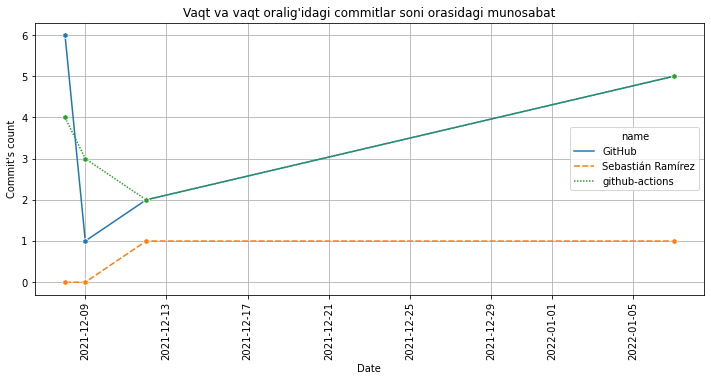

In [54]:
plt.figure(figsize=(12,5))
sns.lineplot(data=count_commits, marker='h')
plt.xticks(rotation=90)
plt.title("Vaqt va vaqt oralig'idagi commitlar soni orasidagi munosabat")
plt.xlabel("Date")
plt.ylabel("Commit's count")
plt.grid()
plt.show()

### `Vaqt va vaqt oralig'idagi commitlar soni orasidagi munosabat` tasvirlovchi ikkinchi issiqlik(heatmap) grafigimizda ham comittlar sonini  vaqt o'tishida o'zgarishini kuzatishimiz mumkin, bunda to'q rangdagigal maximum och rangdagilar minimum qiymatga qarab ketadi.

In [55]:
df_heatmap = count_commits.transpose()
df_heatmap

date,2021-12-08,2021-12-09,2021-12-12,2022-01-07
name,,,,
GitHub,6.0,1.0,2.0,5.0
Sebastián Ramírez,0.0,0.0,1.0,1.0
github-actions,4.0,3.0,2.0,5.0


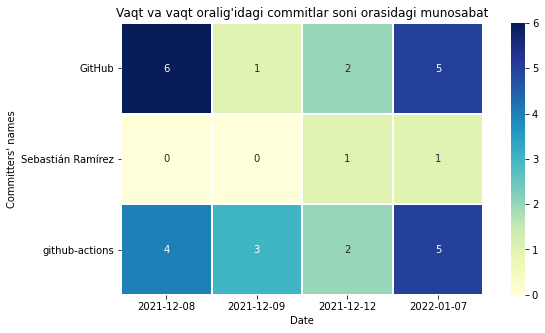

In [65]:
plt.figure(figsize=(10, 5))
sns.heatmap(data=df_heatmap, cmap="YlGnBu", linewidths=1, square=True, annot=True)
plt.title("Vaqt va vaqt oralig'idagi commitlar soni orasidagi munosabat")
plt.xlabel("Date")
plt.ylabel("Committers' names")
plt.show()

___

## great job
#### Asliddin Tuxtasinov